In [154]:
%pip install numpy==2.2.3 pandas==2.2.3 matplotlib==3.10.0 seaborn==0.13.2 scipy==1.15.2 statsmodels==0.14.4

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exercise 1
Write a Python function that determines if the distribution of a pandas Series is symmetric, right-skewed or left-skewed.

In [170]:
np.random.seed(42)

n = 1000

data = {
        'symmetric': np.random.normal(50000, 15000, n),
        'right_skewed': np.random.lognormal(mean=1, sigma=0.7, size=n),
        'left_skewed': -np.random.lognormal(mean=1, sigma=0.3, size=n)
}

df = pd.DataFrame(data)

df.head()

,symmetric,right_skewed,left_skewed
0,57450.712295,7.239476,-2.219865
1,47926.035482,5.192647,-2.602947
2,59715.328072,2.834148,-2.143144
3,72845.447846,1.728310,-2.478396
4,46487.699379,4.431581,-1.540205


funtion skewness

In [171]:
def test_skewness(series):
    series = pd.Series(series)
    skewness = series.skew()
    if skewness > 0.1:
        return "Right-skewed (positively skewed)"
    elif skewness < -0.1 :
        return "Left-skewed (negatively skewed)"
    elif abs(skewness)<0.1:
        return "Symmetric (approximately zero skew)"


test of the function: 

Text(0.5, 1.0, 'Skewness of series: Right-skewed (positively skewed)')

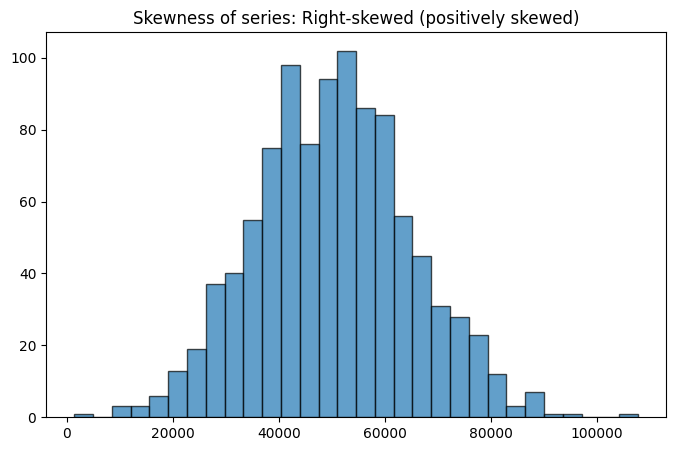

In [177]:
plt.figure(figsize=(8, 5))
plt.hist(df['symmetric'], bins=30, edgecolor='k', alpha=0.7)
plt.title(f"Skewness of series: {test_skewness(df['symmetric'])}")

Text(0.5, 1.0, 'Skewness of series: Right-skewed (positively skewed)')

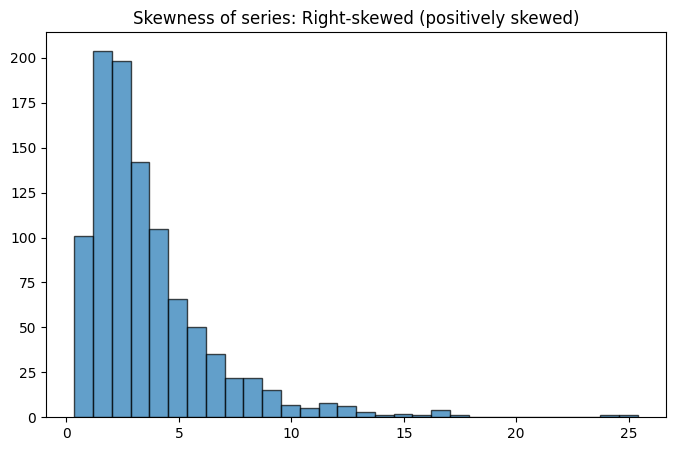

In [178]:
plt.figure(figsize=(8, 5))
plt.hist(df['right_skewed'], bins=30, edgecolor='k', alpha=0.7)
plt.title(f"Skewness of series: {test_skewness(df['right_skewed'])}")

Text(0.5, 1.0, 'Skewness of series: Left-skewed (negatively skewed)')

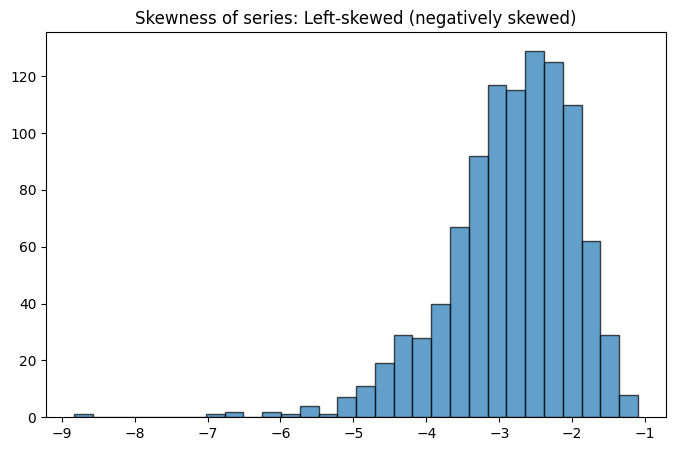

In [179]:
plt.figure(figsize=(8, 5))
plt.hist(df['left_skewed'], bins=30, edgecolor='k', alpha=0.7)
plt.title(f"Skewness of series: {test_skewness(df['left_skewed'])}")

# Exercise 2
A disease affects 2% of a population. The population is divided into three age groups:
* Young (50%): False positive rate 3%, sensitivity 95%.
* Middle-aged (30%): False positive rate 4%, sensitivity 90%.
* Elderly (20%): False positive rate 5%, sensitivity 85%.
    
N.B.
*False positive rate: probability of a person testing positive when they do not have the disease.*
*Sensitivity/True positive rate: probability of a person testing positive when they have the disease.*

If a random person from the population tests positive, what is the probability they actually have the disease?

In [111]:
prevalence = 0.02
non_prevalence = 1- prevalence

Age group percentages

In [112]:
young_pct = 0.5
middle_pct = 0.3
elderly_pct = 0.2

From data, report: 

false positive rate for each group 


Sensitivity (true positive rate) for each group

In [113]:
young_fpr = 0.03
young_sens = 0.95

middle_fpr = 0.04
middle_sens = 0.90

elderly_fpr = 0.05
elderly_sens = 0.85

Total probability of testing positive

In [24]:
p_positive = (
          young_pct * (young_sens * prevalence + young_fpr * non_prevalence) +
         middle_pct * (middle_sens * prevalence + middle_fpr * non_prevalence) +
        elderly_pct * (elderly_sens * prevalence + elderly_fpr * non_prevalence))

Probability of having disease given positive test (Bayes)

In [25]:
p_disease_given_positive = (
        (young_pct * young_sens * prevalence +
         middle_pct * middle_sens * prevalence +
         elderly_pct * elderly_sens * prevalence) / p_positive)

In [27]:
print(f"Probability of disease: {p_disease_given_positive:.5f}")
print(f"Probability of disease: {p_disease_given_positive*100:.1f} %")

Probability of disease: 0.33541
Probability of disease: 33.5 %


# PROVA TEST: qui potrei generare una confusion matrix e testare una popolazione randomica per vedere se conferma i calcoli di probabilità

In [262]:
#poplazione
n=1000 

1. number of ppl for each group
2. number of ppl with desease/healthy

In [263]:
young_n = int(young_pct * n)
middle_n = int(middle_pct * n)
elderly_n = int(elderly_pct * n)

In [264]:
young_diseased = int(young_n * prevalence)
middle_diseased = int(middle_n * prevalence)
elderly_diseased = int(elderly_n * prevalence)

In [265]:
young_healthy = young_n - young_diseased
middle_healthy = middle_n - middle_diseased
elderly_healthy = elderly_n - elderly_diseased

1. find true positive ppl to desease
2. find false positive ppl
3. false negative
4. true negative

In [266]:
# True positive
young_tp = int(young_diseased * young_sens)
middle_tp = int(middle_diseased * middle_sens)
elderly_tp = int(elderly_diseased * elderly_sens)

In [267]:
 # False positive
young_fp = int(young_healthy * young_fpr) 
middle_fp = int(middle_healthy * middle_fpr)
elderly_fp = int(elderly_healthy * elderly_fpr)

In [268]:
#false negative
young_fn = young_diseased - young_tp
middle_fn = middle_diseased - middle_tp
elderly_fn = elderly_diseased - elderly_tp

In [269]:
#true negative
young_tn = young_healthy - young_fp
middle_tn = middle_healthy - middle_fp
elderly_tn = elderly_healthy - elderly_fp

total data to make the CM and plot CM:

In [275]:
TP = young_tp + middle_tp + elderly_tp
FP = young_fp + middle_fp + elderly_fp
FN = young_fn + middle_fn + elderly_fn
TN = young_tn + middle_tn + elderly_tn


In [276]:
CM = np.array([[TP, FP], [FN, TN]])

<Axes: >

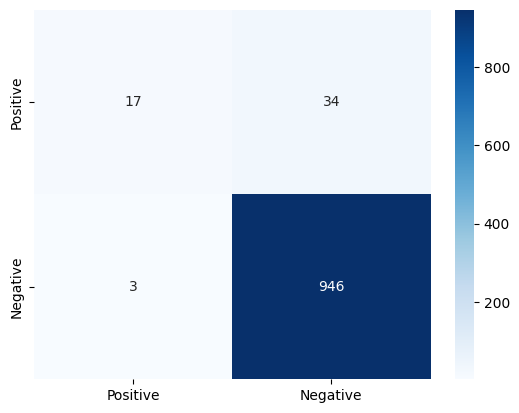

In [277]:
sns.heatmap(CM, annot=True, fmt="d", cmap="Blues", xticklabels=["Positive", "Negative"], yticklabels=["Positive", "Negative"])


In [274]:
print(f"Probability of disease: {TP/(TP+FP)*100:.1f} %")

Probability of disease: 33.3 %
